### 在运行本文件前，需要先运行Logistics_Regression文件中产生训练集和测试集的函数 generate_train_test

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from utils import sigmoid, get_batch, normalization

In [9]:
# relu激活函数
def relu(z):
    a = np.maximum(0,z)
    return a

In [10]:
# 前向传播
def propogate(w,b,x):
    '''
    只有一层隐藏层神经网络的前向传播
    @param：
        w:权值列表
        b:偏置列表
    @return:
        返回最后的网络输出
    '''
    a = x
    z = np.dot(w[0],a) + b[0]
    a = relu(z)
    z = np.dot(w[1],a) + b[1]
    a = sigmoid(z) 
    return a

In [11]:
# 计算正确率
def test(w,b,x,y):
    a = propogate(w,b,x)
    predict = np.where(a > 0.5, 1., 0.)
    accury = 1 - np.mean(np.abs(predict - y))
    return accury

In [12]:

X = np.load('data/train_x.npy')
Y = np.load('data/train_y.npy')

Xt = np.load('data/test_x.npy')
Yt = np.load('data/test_y.npy')
print('the shape of X is', X.shape)
print('the shape of Y is', Y.shape)

the shape of X is (510, 48890)
the shape of Y is (1, 48890)


Training on 200 batch,train set accuty is 0.781, loss is 2.863. Test Accury is 0.798
Training on 400 batch,train set accuty is 0.875, loss is 2.246. Test Accury is 0.852
Training on 600 batch,train set accuty is 0.805, loss is 3.186. Test Accury is 0.752
Training on 800 batch,train set accuty is 0.922, loss is 1.253. Test Accury is 0.857
Training on 1000 batch,train set accuty is 0.898, loss is 1.589. Test Accury is 0.863
Training on 1200 batch,train set accuty is 0.883, loss is 2.016. Test Accury is 0.845
Training on 1400 batch,train set accuty is 0.914, loss is 2.432. Test Accury is 0.865
Training on 1600 batch,train set accuty is 0.891, loss is 2.031. Test Accury is 0.861
Training on 1800 batch,train set accuty is 0.820, loss is 3.527. Test Accury is 0.853
Training on 2000 batch,train set accuty is 0.891, loss is 1.805. Test Accury is 0.859
Training on 2200 batch,train set accuty is 0.891, loss is 1.771. Test Accury is 0.843
Training on 2400 batch,train set accuty is 0.805, loss is 

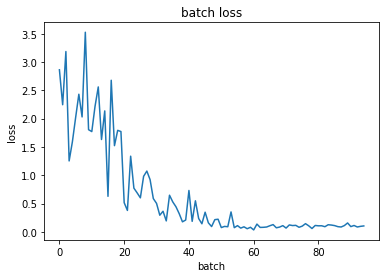

In [31]:
# 放置log下溢，所以加一个很小的量
epsilon = 1e-9
# 迭代次数
TRAIN_STEP = 50
# 学习速率 learning rate
lr = 0.4
alpha = lr
# batch的大小
BATCH_SIZE = 128
# 学习速率衰减系数
LEARNING_RATE_DECAY = 0.25
# 指数加权系数
BETA = 0.9
theta = 1e-4
# 输入结点个数
INPUT_NODE = 510
# 输出结点个数
OUTPUT_NODE = 1
# 隐藏层结点个数
HIDDEN_LAYER = 1020


w1 = np.random.randn(HIDDEN_LAYER, INPUT_NODE)
b1 = np.zeros(shape=[HIDDEN_LAYER, 1])

w2 = np.random.randn(OUTPUT_NODE, HIDDEN_LAYER)
b2 = np.zeros(shape=[OUTPUT_NODE, 1])

# Momentum优化法中的影子变量
v_dw1 = np.zeros(shape=[HIDDEN_LAYER, INPUT_NODE])
v_db1 = np.zeros(shape=[HIDDEN_LAYER, 1])
v_dw2 = np.zeros(shape=[OUTPUT_NODE, HIDDEN_LAYER])
v_db2 = np.zeros(shape=[OUTPUT_NODE, 1])


losses = []
k = 1
for epoch in range(TRAIN_STEP):
    # 每过一个世代学习速率衰减一次
    lr = alpha / (1 + LEARNING_RATE_DECAY * epoch)
    index = 0
    while True:
        x, y, index = get_batch(index, BATCH_SIZE, X, Y)
        if x is None:
            break
        
        m = y.shape[1]
        
        z1 = np.dot(w1, x) + b1
        a1 = relu(z1)
        
        z2 = np.dot(w2, a1) + b2
        a = sigmoid(z2)
        
        cross_entropy = (1 - y) * np.log(1 - a + epsilon) + y * np.log(a + epsilon)
        loss = - np.mean(cross_entropy)
        
        # 反向传播
        dz2 = a - y
        dw2 = np.dot(dz2, a1.T) / m
        db2 = np.mean(dz2, axis=1, keepdims=True)
        
        da1 = np.dot(w2.T, dz2)
        dz1 = np.array(da1, copy=True)
        dz1[z1 <= 0] = 0
        dw1 = np.dot(dz1, x.T) / m
        db1 = np.mean(dz1, axis=1, keepdims=True)
        
        v_dw1 = BETA * v_dw1 + (1 - BETA) * dw1
        v_db1 = BETA * v_db1 + (1 - BETA) * db1
        v_dw2 = BETA * v_dw2 + (1 - BETA) * dw2
        v_db2 = BETA * v_db2 + (1 - BETA) * db2
        
        # 更新参数
        w2 = (1-theta) * w2 - lr * v_dw2
        b2 -= lr * v_db2
        w1 = (1-theta) * w1 -  lr * v_dw1
        b1 -= lr * v_db1
        
        # 每隔500个batch测试一次正确率
        if k % 200 == 0:
            losses.append(loss)
            w = [w1,w2]
            b = [b1,b2]
            accury = test(w,b,Xt,Yt)
            train_acc = test(w,b,x,y)
            print('Training on %d batch,train set accuty is %.3f, loss is %.3f. Test Accury is %.3f' 
                  %(k,train_acc, loss, accury))
        k += 1
        
    
# 画出每500batch的损失（loss）值
plt.figure()
plt.plot(losses)
plt.title('batch loss')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()
        



In [32]:
def Z_Normalization(X):
    mean = np.mean(X, axis=1, keepdims=True)
    std = np.std(X, axis=1, keepdims=True)
    X = (X - mean) / ( std + 1e-8)
    return X

In [33]:
# 加载测试集
path_test ='data/X_test'
dft = pd.read_csv(path_test, dtype=np.float32)
Xtest = dft.iloc[:, 1:].values
Xtest = Xtest.T
dft = None
Xtest = Z_Normalization(Xtest)

In [34]:
# 使用训练模型预测数据
weight = [w1,w2]
bias = [b1,b2]
a = propogate(weight, bias, Xtest)
predict = np.where(a < 0.5, 0, 1)
# print('prediction shape is ', predict.shape)

In [35]:
result = pd.DataFrame(predict.T, columns=['label'])
path_result = 'data/result_one_layer_{}_{}.csv'.format(HIDDEN_LAYER,lr)
result.to_csv(path_result)
print('learning rate is:%g' %lr)

learning rate is:0.0301887
